## Data Science and Big Data 95-885 CMU Spring 2019
### Carol Xiang and Daniel Lesser

### Import Statements

In [1]:
#Data and plotting
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.impute import IterativeImputer #I can't get this to load for some reason...

#Machine Learning Algorithms
#svm, random forest, naive bayes, knn etc...

### Loading in Data

In [2]:
dataIn = pd.read_csv('./Dataset/diabetic_data.csv')

In [3]:
dataIn.shape

(101766, 50)

In [4]:
dataIn.head(5).T

0          1  \
encounter_id                               2278392     149190   
patient_nbr                                8222157   55629189   
race                                     Caucasian  Caucasian   
gender                                      Female     Female   
age                                         [0-10)    [10-20)   
weight                                           ?          ?   
admission_type_id                                6          1   
discharge_disposition_id                        25          1   
admission_source_id                              1          7   
time_in_hospital                                 1          3   
payer_code                                       ?          ?   
medical_specialty         Pediatrics-Endocrinology          ?   
num_lab_procedures                              41         59   
num_procedures                                   0          0   
num_medications                                  1         18   
number_outpatient                                0          0   
number_emergency                                 0          0   
number_inpatient                                 0          0   
diag_1                                      250.83        276   
diag_2                                           ?     250.01   
diag_3                                           ?        255   
number_diagnoses                                 1          9   
max_glu_serum                                 None       None   
A1Cresult                                     None       None   
metformin                                       No         No   
repaglinide                                     No         No   
nateglinide                                     No         No   
chlorpropamide                                  No         No   
glimepiride                                     No         No   
acetohexamide                                   No         No   
glipizide                                       No         No   
glyburide                                       No         No   
tolbutamide                                     No         No   
pioglitazone                                    No         No   
rosiglitazone                                   No         No   
acarbose                                        No         No   
miglitol                                        No         No   
troglitazone                                    No         No   
tolazamide                                      No         No   
examide                                         No         No   
citoglipton                                     No         No   
insulin                                         No         Up   
glyburide-metformin                             No         No   
glipizide-metformin                             No         No   
glimepiride-pioglitazone                        No         No   
metformin-rosiglitazone                         No         No   
metformin-pioglitazone                          No         No   
change                                          No         Ch   
diabetesMed                                     No        Yes   
readmitted                                      NO        >30   

                                        2          3          4  
encounter_id                        64410     500364      16680  
patient_nbr                      86047875   82442376   42519267  
race                      AfricanAmerican  Caucasian  Caucasian  
gender                             Female       Male       Male  
age                               [20-30)    [30-40)    [40-50)  
weight                                  ?          ?          ?  
admission_type_id                       1          1          1  
discharge_disposition_id                1          1          1  
admission_source_id                     7          7          7  
time_in_hospital                        2          2          1  
payer_c

In [5]:
dataIn.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [6]:
id_cols = ['encounter_id', 'patient_nbr']
cat_cols = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id',
           'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
           'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
cont_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
diag_cols = ['diag_1', 'diag_2', 'diag_3']
diag_cols_new = ['diag_1_abbrv', 'diag_2_abbrv', 'diag_3_abbrv']

In [7]:
for feature in dataIn.columns:
    if feature not in id_cols:
        print(feature, ": ", Counter(dataIn[feature]))
        print()

race :  Counter({'Caucasian': 76099, 'AfricanAmerican': 19210, '?': 2273, 'Hispanic': 2037, 'Other': 1506, 'Asian': 641})

gender :  Counter({'Female': 54708, 'Male': 47055, 'Unknown/Invalid': 3})

age :  Counter({'[70-80)': 26068, '[60-70)': 22483, '[50-60)': 17256, '[80-90)': 17197, '[40-50)': 9685, '[30-40)': 3775, '[90-100)': 2793, '[20-30)': 1657, '[10-20)': 691, '[0-10)': 161})

weight :  Counter({'?': 98569, '[75-100)': 1336, '[50-75)': 897, '[100-125)': 625, '[125-150)': 145, '[25-50)': 97, '[0-25)': 48, '[150-175)': 35, '[175-200)': 11, '>200': 3})

admission_type_id :  Counter({1: 53990, 3: 18869, 2: 18480, 6: 5291, 5: 4785, 8: 320, 7: 21, 4: 10})

discharge_disposition_id :  Counter({1: 60234, 3: 13954, 6: 12902, 18: 3691, 2: 2128, 22: 1993, 11: 1642, 5: 1184, 25: 989, 4: 815, 7: 623, 23: 412, 13: 399, 14: 372, 28: 139, 8: 108, 15: 63, 24: 48, 9: 21, 17: 14, 16: 11, 19: 8, 10: 6, 27: 5, 12: 3, 20: 2})

admission_source_id :  Counter({7: 57494, 1: 29565, 17: 6781, 4: 3187, 6:

nateglinide :  Counter({'No': 101063, 'Steady': 668, 'Up': 24, 'Down': 11})

chlorpropamide :  Counter({'No': 101680, 'Steady': 79, 'Up': 6, 'Down': 1})

glimepiride :  Counter({'No': 96575, 'Steady': 4670, 'Up': 327, 'Down': 194})

acetohexamide :  Counter({'No': 101765, 'Steady': 1})

glipizide :  Counter({'No': 89080, 'Steady': 11356, 'Up': 770, 'Down': 560})

glyburide :  Counter({'No': 91116, 'Steady': 9274, 'Up': 812, 'Down': 564})

tolbutamide :  Counter({'No': 101743, 'Steady': 23})

pioglitazone :  Counter({'No': 94438, 'Steady': 6976, 'Up': 234, 'Down': 118})

rosiglitazone :  Counter({'No': 95401, 'Steady': 6100, 'Up': 178, 'Down': 87})

acarbose :  Counter({'No': 101458, 'Steady': 295, 'Up': 10, 'Down': 3})

miglitol :  Counter({'No': 101728, 'Steady': 31, 'Down': 5, 'Up': 2})

troglitazone :  Counter({'No': 101763, 'Steady': 3})

tolazamide :  Counter({'No': 101727, 'Steady': 38, 'Up': 1})

examide :  Counter({'No': 101766})

citoglipton :  Counter({'No': 101766})

insulin

##### Features changes to make:

a. Consider omitting these columns due to high proportion of missing values:

    weight, payer_code, medical_specialty, 

1. Drop rows with unknown/invalid gender
2. Fill in missing values '?' for the following columns:

    race, weight, payer_code, medical_specialty, diag_1, diag_2, diag_3,readmitted
    
    
3. Turn the following columns into categorical columns via OHE

    admission_type_id, discharge_disposition_id, admission_source_id, payer_code, medical_specialty
    
    
4. Turn the following columns into ordinal features

    Test results: max_glu_serum, A1Cresult
    
    All medications from metformin through metformin-pioglitazone
    
    
4. Turn the following columns into binary columns (1,0)

    change, diabetesMed, readmitted
    
    
5. Group together diag_1,diag_2 and diag_3 into one column with combined counts.
6. Group together diag_123 into smaller subgroups using ICD9 codings
7. Turn diag_123 into dummy features via OHE

### Data Cleaning

In [8]:
#Drop unknown/invalid gender columns
origRows = dataIn.shape[0]
dataIn = dataIn[dataIn.gender != 'Unknown/Invalid']
print(origRows-dataIn.shape[0], " rows dropped")

3  rows dropped


In [9]:
#Drop Weight column due to high proportion of '?'
dataIn.drop('weight',axis=1, inplace=True)
dataIn.drop('payer_code', axis=1, inplace=True)
dataIn.drop('medical_specialty', axis=1, inplace=True)

#### Data Imputation

In [10]:
for diag in diag_cols:
    print(diag+"_abbrv")

diag_1_abbrv
diag_2_abbrv
diag_3_abbrv


In [11]:
#Reduce each diag code to first 3 letters.
for diag in diag_cols:
    diagNew = diag+"_abbrv"
    dataIn[diagNew] = dataIn[diag].str[:3]

In [12]:
#Replace '?' with NaN
dataIn.replace('?', np.NaN, inplace=True)

In [13]:
dataIn.isna().sum()

encounter_id                   0
patient_nbr                    0
race                        2271
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [14]:
#Drop n.a rows for race
origRows = dataIn.shape[0]
dataIn = dataIn[dataIn.gender != 'Unknown/Invalid']
dataIn.dropna(subset=['race'], inplace=True)
print(origRows-dataIn.shape[0], " rows dropped")

2271  rows dropped


In [15]:
dataIn.isna().sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        19
diag_2                       336
diag_3                      1349
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [16]:
for feature in dataIn.columns:
    if feature not in id_cols:
        print(feature, ": ", Counter(dataIn[feature]))
        print()

race :  Counter({'Caucasian': 76099, 'AfricanAmerican': 19210, 'Hispanic': 2037, 'Other': 1505, 'Asian': 641})

gender :  Counter({'Female': 53575, 'Male': 45917})

age :  Counter({'[70-80)': 25468, '[60-70)': 21988, '[50-60)': 16895, '[80-90)': 16800, '[40-50)': 9465, '[30-40)': 3699, '[90-100)': 2724, '[20-30)': 1611, '[10-20)': 682, '[0-10)': 160})

admission_type_id :  Counter({1: 52900, 3: 18507, 2: 17786, 6: 5225, 5: 4727, 8: 317, 7: 20, 4: 10})

discharge_disposition_id :  Counter({1: 58767, 3: 13614, 6: 12698, 18: 3673, 2: 2061, 22: 1981, 11: 1608, 5: 1143, 25: 973, 4: 765, 7: 611, 23: 406, 13: 397, 14: 369, 28: 138, 8: 107, 15: 63, 24: 48, 9: 21, 17: 14, 16: 11, 19: 8, 10: 6, 27: 5, 12: 3, 20: 2})

admission_source_id :  Counter({7: 56632, 1: 28854, 17: 6698, 4: 2986, 6: 1989, 2: 1042, 5: 848, 3: 187, 20: 160, 9: 54, 8: 16, 22: 12, 10: 7, 14: 2, 11: 2, 25: 2, 13: 1})

time_in_hospital :  Counter({3: 17342, 2: 16841, 1: 13877, 4: 13605, 5: 9763, 6: 7366, 7: 5720, 8: 4297, 9: 29

A1Cresult :  Counter({'None': 82896, '>8': 7961, 'Norm': 4905, '>7': 3730})

metformin :  Counter({'No': 79971, 'Steady': 17920, 'Up': 1039, 'Down': 562})

repaglinide :  Counter({'No': 97963, 'Steady': 1375, 'Up': 109, 'Down': 45})

nateglinide :  Counter({'No': 98796, 'Steady': 662, 'Up': 23, 'Down': 11})

chlorpropamide :  Counter({'No': 99407, 'Steady': 78, 'Up': 6, 'Down': 1})

glimepiride :  Counter({'No': 94458, 'Steady': 4527, 'Up': 321, 'Down': 186})

acetohexamide :  Counter({'No': 99491, 'Steady': 1})

glipizide :  Counter({'No': 87093, 'Steady': 11101, 'Up': 754, 'Down': 544})

glyburide :  Counter({'No': 89113, 'Steady': 9039, 'Up': 794, 'Down': 546})

tolbutamide :  Counter({'No': 99470, 'Steady': 22})

pioglitazone :  Counter({'No': 92316, 'Steady': 6829, 'Up': 230, 'Down': 117})

rosiglitazone :  Counter({'No': 93265, 'Steady': 5968, 'Up': 175, 'Down': 84})

acarbose :  Counter({'No': 99190, 'Steady': 289, 'Up': 10, 'Down': 3})

miglitol :  Counter({'No': 99454, 'Steady

#### Transforming Categorical Columns

In [17]:
# One-hot-encoding the following columns 
# ??????? look into 2 options, too many medical sepcialties ????????
ohe_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'race']

for col_name in ohe_cols:
    # n/a not encoded, include all the encoded columns
    dataIn = pd.concat([dataIn, pd.get_dummies(dataIn[col_name], prefix=col_name)],axis=1)
    #dataIn.drop([col_name],axis=1, inplace=True) # keep the original colums for now

In [18]:
# Turn the following columns (test results, medications and age) into ordinal features
ord_cols = ['max_glu_serum', 'A1Cresult',
           'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
           'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone', 'metformin-pioglitazone',
           'age']        

def change_ord_cols(value):
    '''
    Takes a feature and converts it into an ordinal column.  Based on value domain available in the
    original dataset.  If additional features and/or values are added, this method needs to be adjusted
    to account for that.
    '''
    if value == 'None' or value == 'No':
        return '0'
    elif value == 'Norm' or value == 'Down':
        return '1'
    elif value in ['>200', '>7', 'Steady']:
        return '2'
    elif value in ['>300', '>8', 'Up']:
        return '3'

ord_cols_new = []

for col_name in ord_cols[:-1]:
    new_col_name = col_name + "_ord"
    ord_cols_new.append(new_col_name)
    dataIn[new_col_name] = dataIn[col_name].map(lambda x: int(change_ord_cols(x)))

dataIn['age_ord'] = dataIn['age'].map(lambda x: x[1:2])

In [19]:
# Turn the following columns into binary features
# Had change, prescribed biabetes med, readmitted<30  ==>  1
# No change, did not prescribed diabetes med, not readmitted or readmitted>30  ==>  0
# Male ==>  1

bin_cols = ['change', 'diabetesMed', 'readmitted', 'gender']

def change_bin_cols(value):
    '''
    Creates dummy binary features based on input columns.
    '''
    if value in ['No', 'NO', '>30', 'Female']:
        return '0'
    elif value in ['Ch', 'Yes', '<30', 'Male']:
        return '1'  

for col_name in bin_cols:
    new_col_name = col_name + "_bin"
    dataIn[new_col_name] = dataIn[col_name].map(lambda x: int(change_bin_cols(x)))

dataIn.rename(columns={'gender_bin':'is_male'}, inplace=True)

#### Combining Diagnoses

In [20]:
#Note: need to handle a few categories differently

#For infectious conditions
infec_list = ['00{}'.format(i) for i in range(1, 10)]
temp = ['0{}'.format(i) for i in range(10, 100)]
infec_list+=temp
temp = ['{}'.format(i) for i in range(100, 140)]
infec_list+=temp

In [21]:
#for supplementary conditions
suppl_list = ['V0{}'.format(i) for i in range(1, 10)]
temp = ['V{}'.format(i) for i in range(10, 92)]
suppl_list+= temp

In [22]:
#for external conditions
external_list = ['E00{}'.format(i) for i in range(0, 10)]
temp = ['E0{}'.format(i) for i in range(10, 31)]
external_list+= temp
temp = ['E{}'.format(i) for i in range(800, 1000)]
external_list+= temp

In [23]:
#Codes from http://www.icd9data.com/2015/Volume1/default.htm
diag_codes = {'Infect_Paras_d' : np.arange(1,140), 'Neoplasm_d' : np.arange(140,240),
             'Endo_Nutri_Immun_d' : np.arange(240,280), 'Blood_d' : np.arange(280,290),
             'Mental_d' : np.arange(290,320), 'Nervous_d' : np.arange(320, 390), 
             'Circulatory_d' : np.arange(390, 460), 'Respiratory_d' : np.arange(460, 520),
             'Digestive_d' : np.arange(520, 580), 'Genitourinary' : np.arange(580, 630), 
             'Pregnancy_d' : np.arange(630, 680), 'Skin_d' : np.arange(680,710), 
             'Muscu_Connective_d' : np.arange(710, 740), 'Congentinal_d' : np.arange(740, 760), 
             'Perinatal_d' : np.arange(760, 780), 'Ill_Defined_d' : np.arange(780, 800), 
             'Injury_d' : np.arange(800, 1000), 'Supplementary_d' : suppl_list, 
             'External_d' : external_list}

In [24]:
#convert to strings for easy comparison to diag_1, diag_2, diag_3
for key, value in diag_codes.items():
    diag_codes[key] = [str(i) for i in value]

In [25]:
#create blank columns
for c in diag_codes:
    dataIn[c] = 0

In [26]:
def diagonsis_col_creation(row, diag_code, diag_col):
    '''
    Loops through the values in the diagnoses codes and returns 1 if the diagnosis provided
    matches that grouping, otherwise returns zero. For use with DataFrame.apply().  Row = row in dataframe.
    diag_cols = one of the three diag_1, _2, _3 columns in dataframe.  diag_code = grouped codings.
    '''
    
    #check first if its already = 1
    if row[diag_code] == np.NaN:
        return 0
    elif row[diag_code] == 1:
        return 1
    else:
        if row[diag_col] in diag_codes[diag_code]:
            return 1
        else:
            return 0

In [27]:
%%time
#do coding for dummy disease columns
for diag_code in diag_codes: #loop through to create all the columns
    for diag_col in diag_cols_new: #go through each of the three diagonses
        dataIn[diag_code] = dataIn.apply(lambda row: diagonsis_col_creation(row, diag_code,diag_col),axis=1)

CPU times: user 3min 4s, sys: 5.72 s, total: 3min 10s
Wall time: 3min 9s


In [28]:
dataIn.sample(5).T

28169      50622      29896      46372  \
encounter_id                   92227668  151835508   97222422  143086470   
patient_nbr                   105520095   81078066   24260184   28694997   
race                           Hispanic  Caucasian  Caucasian   Hispanic   
gender                             Male     Female       Male       Male   
age                             [60-70)    [70-80)    [70-80)    [50-60)   
admission_type_id                     1          2          5          2   
discharge_disposition_id              1         23          6          1   
admission_source_id                   7          1         17          7   
time_in_hospital                      3          9          7          6   
num_lab_procedures                   54         52         18          8   
num_procedures                        2          2          0          3   
num_medications                      18         21         17          9   
number_outpatient                     0          0          0          0   
number_emergency                      0          0          0          0   
number_inpatient                      0          0          0          0   
diag_1                              511        820        276        428   
diag_2                              496        424        785        584   
diag_3                              250        428        303      250.4   
number_diagnoses                      8          9          9          9   
max_glu_serum                      None       None       Norm       None   
A1Cresult                          None       None       None       None   
metformin                            No         No         No         No   
repaglinide                          No         No         No         No   
nateglinide                          No         No         No         No   
chlorpropamide                       No         No         No         No   
glimepiride                          No         No         No         No   
acetohexamide                        No         No         No         No   
glipizide                            No         No         No     Steady   
glyburide                            No         No         No         No   
tolbutamide                          No         No         No         No   
...                                 ...        ...        ...        ...   
insulin_ord                           2          0          2          2   
glyburide-metformin_ord               0          0          0          0   
glipizide-metformin_ord               0          0          0          0   
glimepiride-pioglitazone_ord          0          0          0          0   
metformin-rosiglitazone_ord           0          0          0          0   
metformin-pioglitazone_ord            0          0          0          0   
age_ord                               6          7          7          5   
change_bin                            1          0          0          1   
diabetesMed_bin                       1          0          1          1   
readmitted_bin                        1          0          0          0   
is_male                               1          0          1          1   
Infect_Paras_d                        0          0          0          0   
Neoplasm_d                            0          0          0          0   
Endo_Nutri_Immun_d                    1          0          1          1   
Blood_d                               0          0          0          0   
Mental_d                              0          0          1          0   
Nervous_d                             0          0          0          0   
Circulatory_d                         0          1          0          1   
Respiratory_d                         1          0          0          0   
Digestive_d                           0          0          0          0   
Genitourinary                         0          0          0          1   
Pregna

### Data Visualization

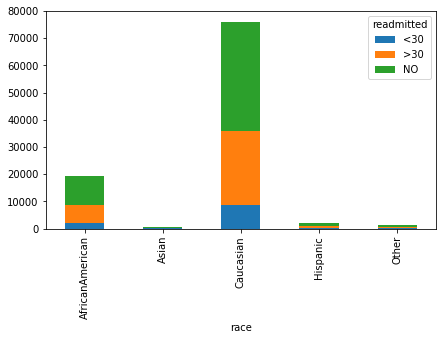

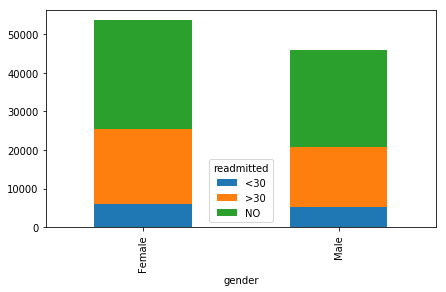

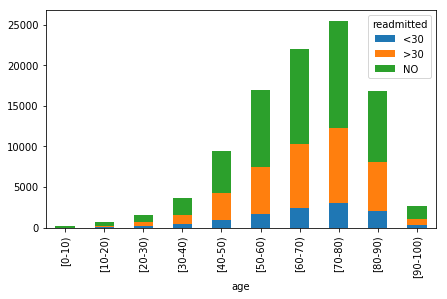

In [29]:
demographics = ['race','gender','age']

def visual_demographics():
    '''
    Plot stacked bar charts to visualize readmission rate of groups with different demographic features
    '''
    for col in demographics:
        pivot_tab = dataIn.pivot_table(index=col, columns='readmitted', values='encounter_id', aggfunc='count')
        pivot_tab.plot.bar(stacked=True, figsize=(7,4))

visual_demographics()

#### Deleting Outliers

In [30]:
dataIn[cont_cols].describe()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      99492.000000        99492.000000    99492.000000     99492.000000   
mean           4.398454           43.072971        1.340540        16.026545   
std            2.986972           19.695587        1.703686         8.119809   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000          132.000000        6.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count       99492.000000      99492.000000      99492.000000      99492.000000  
mean            0.373357          0.201343          0.643107          7.439251  
std             1.276805          0.939981          1.271370          1.926043  
min             0.000000          0.000000          0.000000          1.000000  
25%             0.000000          0.000000          0.000000          6.000000  
50%             0.000000          0.000000          0.000000          8.000000  
75%             0.000000          0.000000          1.000000          9.000000  
max            42.000000         76.000000         21.000000         16.000000

In [31]:
# %%time
## Hat matrix calculations to identify outliers
# saved_data = dataIn
# n_rows = len(dataIn)

# dataIn_cont = dataIn[cont_cols]

# hat_m = dataIn_cont(np.linalg.inv(dataIn_cont.T.dot(dataIn)).dot(dataIn_cont.T))
# hat_v = np.sum(hat_m **2,0)

# plt.scatter(range(len(hat_v)), hat_v, s=1000*hat_v, alpha=0.6)

# # find observations whose hat values exceed 2 times the average
# vindex = np.where(hat_v > 2*np.mean(hat_v))
# print(vindex[0])

# dataIn.drop(vindex[0], inplace = True)

# print("Removed " + str(n_rows - len(dataIn)) + " rows")

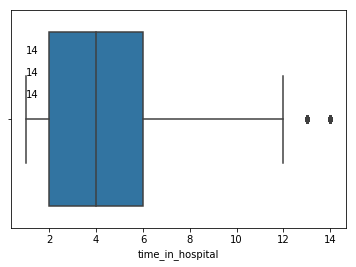

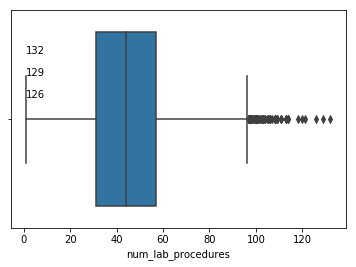

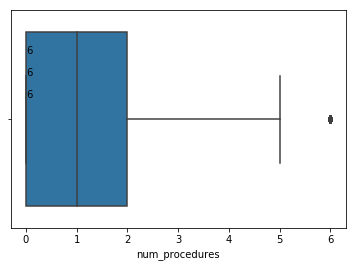

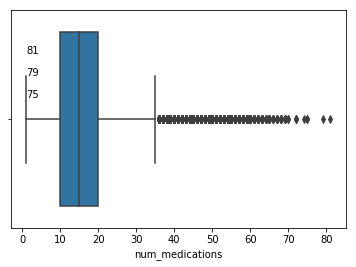

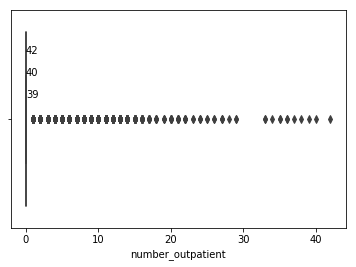

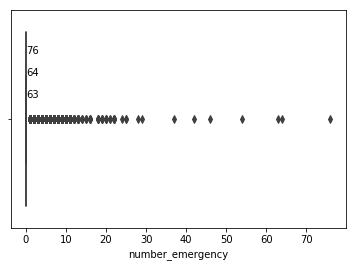

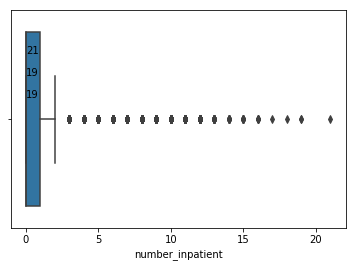

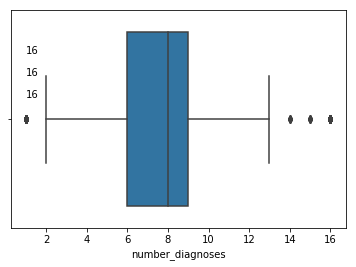

In [32]:
def visual_continious_cols():
    '''
    This function visualizes Box-and-whisker plots for continuous variables
    '''
    for i in cont_cols:
        sns.boxplot(dataIn[i])

        # Print the three highest values
        highest_vals = sorted(dataIn[i].tolist(),reverse=True)[:3]
        smallest_val = min(dataIn[i])
        
        plt.text(smallest_val, -0.3, highest_vals[0])
        plt.text(smallest_val, -0.2, highest_vals[1])
        plt.text(smallest_val, -0.1, highest_vals[2])

        plt.show()
        
visual_continious_cols()

In [33]:
saved_data = dataIn
n_rows = len(dataIn)
# Method 1
# Delete observations with one of the following features higher than 99th percentile 
# Continuous features with outliers of extremely large values
# cols = ['num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency','number_inpatient']

# for col in cols:
#     P = np.percentile(saved_data[col], 99)
#     dataIn = dataIn[(dataIn[col] < P)]

# Method 2
# Delete observations with one of the following features valued more than 3*IQR above 75th percentile
# Continuous features with non-zero median
cols = set(cont_cols) - set(['number_outpatient', 'number_emergency', 'number_inpatient'])

for col in cols:
    cutoff = 3*np.subtract(*np.percentile(saved_data[col], [75, 25])) + np.percentile(saved_data[col], 75)
    dataIn = dataIn[(dataIn[col]) < cutoff]
    
print("Removed " + str(n_rows - len(dataIn)) + " rows")

Removed 471 rows


#### Dealing with skewness in continuous variables

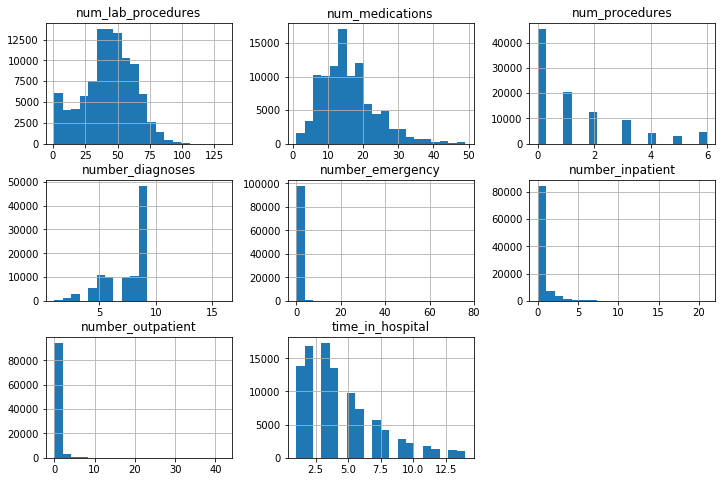

In [34]:
dataIn[cont_cols].hist(bins=20,figsize=(12,8));

In [35]:
cont_cols_boxcox = []
for col in cont_cols:
    col_new = col + '_boxcox'
    cont_cols_boxcox.append(col_new)
    # add 1 to variables with value 0 (cannot box-cox tranform non-positive values)
    if dataIn[col].min() == 0:
        dataIn[col_new], _ = stats.boxcox(dataIn[col]+1)
    else:
        dataIn[col_new], _ = stats.boxcox(dataIn[col])

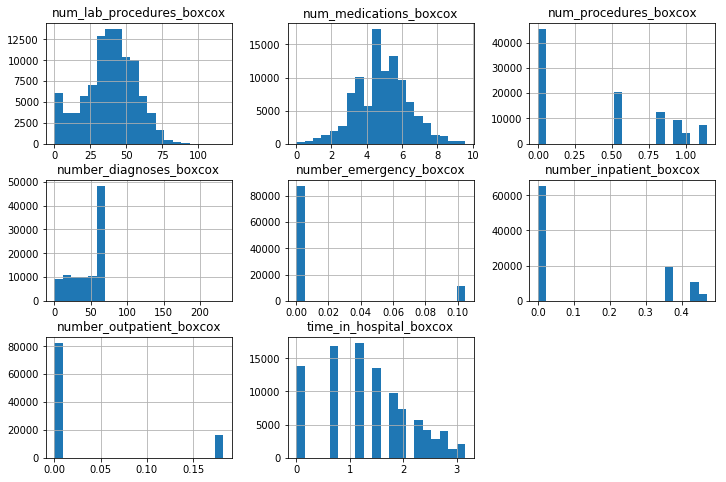

In [36]:
dataIn[cont_cols_boxcox].hist(bins=20,figsize=(12,8));

### Prepare train and test data

#### Splitting

In [37]:
# Drop the original columns that have been encoded and save as data_encoded
# Original columns are kept in dataIn
data_encoded = dataIn.drop(ohe_cols+ord_cols+bin_cols, axis=1)

In [38]:
y = data_encoded['readmitted_bin']

# normalized X for parametric models
all_cols = data_encoded.columns
X_norm = data_encoded[set(all_cols)-set(cont_cols)]
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=1)  

# unnormalized X for non-parametric models
X_unnorm = data_encoded[set(all_cols)-set(cont_cols_boxcox)]
X_unnorm_train, X_unnorm_test, y_unnorm_train, y_unnorm_test = train_test_split(
    X_unnorm, y, test_size=0.2, random_state=1)

#### Normalizing features

In [39]:
# Use MinMax scaler to normalize continuous and ordinal features
scaler = MinMaxScaler()
X_norm_train[cont_cols_boxcox + ord_cols_new] = scaler.fit_transform(
    X_norm_train[cont_cols_boxcox + ord_cols_new])

# Apply the same scaler on test data
X_norm_test[cont_cols_boxcox + ord_cols_new] = scaler.transform(X_norm_test[cont_cols_boxcox + ord_cols_new])

/Users/xiangxiang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/xiangxiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/xiangxiang/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/